Importing the required libraries


In [1]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import datetime as dt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
plt.style.use('seaborn-darkgrid')
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Loading the dataset


In [2]:
df1 = pd.read_csv('stocknet_trn_data.csv')
df2 = pd.read_csv('stocknet_trn_data_targets.csv', names = ['label', 'close'])
df3 = pd.read_csv('stocknet_tst_data.csv')

In [3]:
df1.head()

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0


In [4]:
df2.head()

,label,close
0,d1,75.650002
1,d2,124.449997
2,d3,82.660004
3,d4,57.009998
4,d5,47.860001


In [5]:
df3.head()

,Open,High,Low,Volume
0,26.299999,26.520000,25.959999,32642100
1,95.550003,95.739998,94.019997,1826300
2,54.770000,55.360001,54.590000,5656800
3,125.589996,125.820000,123.660004,4151600
4,20.709999,20.809999,20.670000,10489800


In [6]:
df1[df1.isna().any(axis=1)]

,Open,High,Low,Volume
7642,NaN,NaN,NaN,NaN
46002,NaN,NaN,NaN,NaN
61502,NaN,NaN,NaN,NaN


In [7]:
df2[df2.isna().any(axis=1)]

,label,close
7642,d7643,NaN
46002,d46003,NaN
61502,d61503,NaN


In [8]:
df3[df3.isna().any(axis=1)]

,Open,High,Low,Volume


In [9]:
df1.dropna(how='any', inplace=True)

In [10]:
df2.dropna(how='any', inplace=True)

In [11]:
df1.isna().sum()

Open      0
High      0
Low       0
Volume    0
dtype: int64

In [12]:
df2.isna().sum()

label    0
close    0
dtype: int64

In [13]:
df1.head()

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0


In [14]:
df2.head()

,label,close
0,d1,75.650002
1,d2,124.449997
2,d3,82.660004
3,d4,57.009998
4,d5,47.860001


In [15]:
df = pd.concat([df1, df2], axis=1, join='inner')

In [16]:
df.head()

,Open,High,Low,Volume,label,close
0,75.430000,75.910004,75.139999,3436700.0,d1,75.650002
1,124.930000,124.940002,124.169998,2366700.0,d2,124.449997
2,84.339996,84.370003,82.370003,11338700.0,d3,82.660004
3,56.770000,57.150002,56.529999,413300.0,d4,57.009998
4,47.419998,48.090000,46.759998,9531100.0,d5,47.860001


In [17]:
df.isna().sum()

Open      0
High      0
Low       0
Volume    0
label     0
close     0
dtype: int64

In [18]:
X = df[['Open', 'High', 'Low', 'Volume']]

In [19]:
X.head()

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0


In [20]:
y = df.iloc[:, 5:6]

In [21]:
y.head()

,close
0,75.650002
1,124.449997
2,82.660004
3,57.009998
4,47.860001


In [22]:
X.shape

(97729, 4)

In [23]:
y.shape

(97729, 1)

Scaling the data to have reduction in computational cost

In [24]:
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#performing the train test slpit

Support Vector Regression

In [26]:
svr_lin  = SVR(kernel='linear', C=100)
#svr_poly = SVR(kernel='poly', C=0.1, degree=2)
#svr_rbf = SVR(kernel='rbf', C=0.1, gamma=0.1)

In [27]:
svr_lin.fit(X_train, y_train)

SVR(C=100, kernel='linear')

In [28]:

y_pred = svr_lin.predict(X_test)

In [29]:
y_pred

array([0.10402176, 0.10028848, 0.10016221, ..., 0.10005794, 0.10037137,
       0.74396701])

In [30]:

y_test

array([[5.00173445e-03],
       [3.65933765e-04],
       [2.09510829e-04],
       ...,
       [7.23456078e-05],
       [4.65026254e-04],
       [7.96882594e-01]])

Errors


In [31]:
sqrt(mean_squared_error(y_test, y_pred)) #RMSE

0.09949457360308639

In [32]:
def MBE(y_true, y_pred):
    '''
    Parameters:
        y_true (array): Array of observed values
        y_pred (array): Array of prediction values

    Returns:
        mbe (float): Biais score
    '''
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_true = y_true.reshape(len(y_true),1)
    y_pred = y_pred.reshape(len(y_pred),1)   
    diff = (y_true-y_pred)
    mbe = diff.mean()
    print('MBE = ', mbe)

In [33]:
MBE(y_test, y_pred) #negative bais error mean that the values predicted are less than the actual values.

MBE =  -0.09820216032690028


In [34]:
mean_absolute_percentage_error(y_test, y_pred) #mean absolute percentage error

650.8797254615131

Moving Averages

In [35]:
def computeSMA(data, window):
    # simple moving average
    sma = data.rolling(window=window).mean()

    return sma

def computeEMA(data, span):
    # simple moving average
    ema = data.ewm(span=span, adjust=False).mean()

    return ema

def construct_df(df_input):
    
    # compute both types of moving averages with a window of 50
    for i in range(3, 11, 2):
        
        df_input['SMA_{}'.format(i)] = computeSMA(df_input['close'], i)
    for i in range(3, 11, 2):
       
        df_input['EMA_{}'.format(i)] = computeEMA(df_input['close'], i)
    
    return df_input  

In [36]:
df_copy = df.copy(deep=True)

In [37]:
df_moving_avg = construct_df(df_copy)

In [38]:
df_moving_avg.tail() #moving averages this can be further used as inputs

,Open,High,Low,Volume,label,close,SMA_3,SMA_5,SMA_7,SMA_9,EMA_3,EMA_5,EMA_7,EMA_9
97727,103.650002,103.809998,103.089996,3678200.0,d97728,103.230003,54.520002,51.012001,47.690001,46.746668,66.041618,57.266251,54.554037,54.221970
97728,64.419998,64.730003,64.190002,20273100.0,d97729,64.620003,61.366669,50.228001,50.638573,50.451112,65.330811,59.717502,57.070528,56.301577
97729,581.070007,581.400024,571.070007,3416500.0,d97730,575.140015,247.663340,160.664005,127.831432,108.176669,320.235413,231.525006,186.587900,160.069264
97730,120.650002,120.650002,114.959999,13261700.0,d97731,115.400002,251.720007,174.928005,134.525718,116.112225,217.817707,192.816671,168.790925,151.135412
97731,64.870003,64.959999,64.309998,667000.0,d97732,64.720001,251.753339,184.622005,140.491432,119.437781,141.268854,150.117781,142.773194,133.852330


Random forest regression


In [39]:
regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [40]:
regressor_rf.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [41]:
y_pred_rf = regressor_rf.predict(X_test)

Errors

In [42]:
sqrt(mean_squared_error(y_test, y_pred_rf)) #RMSE

0.0003833374789064347

In [43]:
def MBE(y_true, y_pred):
    '''
    Parameters:
        y_true (array): Array of observed values
        y_pred (array): Array of prediction values

    Returns:
        mbe (float): Biais score
    '''
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_true = y_true.reshape(len(y_true),1)
    y_pred = y_pred.reshape(len(y_pred),1)   
    diff = (y_true-y_pred)
    mbe = diff.mean()
    print('MBE = ', mbe)

In [44]:
MBE(y_test, y_pred_rf)

MBE =  5.416314273727215e-07


In [45]:
mean_absolute_percentage_error(y_test, y_pred_rf)

0.004281758986736554

KNN


In [46]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.00042377638346645244
RMSE value for k=  2 is: 0.000403223435841934
RMSE value for k=  3 is: 0.00039134393627343486
RMSE value for k=  4 is: 0.00038747990149310107
RMSE value for k=  5 is: 0.00038966344935103885
RMSE value for k=  6 is: 0.0004126360605651106
RMSE value for k=  7 is: 0.0004210554347311335
RMSE value for k=  8 is: 0.0004333792007746501
RMSE value for k=  9 is: 0.00044398366072807784
RMSE value for k=  10 is: 0.00045555539129484284
RMSE value for k=  11 is: 0.00046905248623701286
RMSE value for k=  12 is: 0.0004814868029594747
RMSE value for k=  13 is: 0.0004929502113217952
RMSE value for k=  14 is: 0.0005064086687687691
RMSE value for k=  15 is: 0.0005159891028947974
RMSE value for k=  16 is: 0.0005274993683810861
RMSE value for k=  17 is: 0.0005388830976266956
RMSE value for k=  18 is: 0.0005514486128564067
RMSE value for k=  19 is: 0.0005603722191408922
RMSE value for k=  20 is: 0.000573389325577952


<AxesSubplot:>

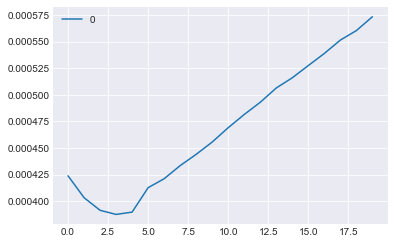

In [47]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [48]:
#At k = 4, approx, we can see we have the lowest rmse

In [49]:
#varifying the same using gridsearch

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 4}

Errors

In [50]:
model = neighbors.KNeighborsRegressor(n_neighbors = 4)
model.fit(X_train, y_train)  #fit the model
y_pred_knn=model.predict(X_test)

In [51]:
MBE(y_test, y_pred_knn) #MBE

MBE =  1.6444801858764655e-06


In [52]:
mean_absolute_percentage_error(y_test, y_pred_knn) #MAPE

0.04036588432232497

In [53]:
sqrt(mean_squared_error(y_test, y_pred_knn)) #RMSE

0.00038747990149310107

Working on all the models with Moving Averages as features, window being 50


In [54]:
print(df_moving_avg.columns)

Index(['Open', 'High', 'Low', 'Volume', 'label', 'close', 'SMA_3', 'SMA_5',
       'SMA_7', 'SMA_9', 'EMA_3', 'EMA_5', 'EMA_7', 'EMA_9'],
      dtype='object')


In [56]:
X_avg = df_moving_avg[['Open', 'High', 'Low', 'Volume', 'SMA_3', 'SMA_5',
       'SMA_7', 'SMA_9', 'EMA_3', 'EMA_5', 'EMA_7', 'EMA_9']]

In [57]:
X_avg.dropna(how='any', inplace=True)

In [58]:
X_avg.shape

(97721, 12)

In [59]:
y_avg = df_moving_avg.iloc[:, 5:6]

In [60]:
y_avg

,close
0,75.650002
1,124.449997
2,82.660004
3,57.009998
4,47.860001
...,...
97727,103.230003
97728,64.620003
97729,575.140015
97730,115.400002


In [61]:
y_avg.dropna(how='any', inplace=True)

In [62]:
y_avg.shape

(97729, 1)

In [67]:
y_avg = np.resize(y_avg, (97721, 1))

In [68]:
y_avg.shape

(97721, 1)

In [69]:
X_avg = sc_X.fit_transform(X_avg)
y_avg = sc_y.fit_transform(y_avg)

In [70]:
X_train_avg, X_test_avg, y_train_avg, y_test_avg = train_test_split(X_avg, y_avg, test_size=0.33, random_state=42)

In [71]:
X_test_avg

array([[1.09751590e-04, 1.09204430e-04, 1.08545645e-04, ...,
        1.90517357e-02, 5.02611727e-02, 8.60145708e-02],
       [2.82663490e-04, 2.83858201e-04, 2.83797791e-04, ...,
        3.46021071e-04, 4.20783230e-04, 4.81081908e-04],
       [2.89628357e-04, 2.93642646e-04, 2.91508900e-04, ...,
        4.04542525e-02, 8.73494456e-02, 1.33977186e-01],
       ...,
       [2.81160553e-05, 2.75576262e-05, 2.71917551e-05, ...,
        2.15903951e-04, 2.62313167e-04, 2.97204100e-04],
       [2.99379181e-04, 3.05259351e-04, 2.99736513e-04, ...,
        4.21982302e-04, 4.71742231e-04, 5.10950294e-04],
       [1.43062602e-04, 1.44253542e-04, 1.44618715e-04, ...,
        1.99251792e-03, 9.43967657e-03, 2.33053303e-02]])

Random forest

In [72]:
regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0, max_features = 12)

In [73]:
regressor_rf_avg = regressor_rf.fit(X_train_avg, y_train_avg)

In [74]:
y_pred_rf_avg = regressor_rf_avg.predict(X_test_avg)

In [75]:
MBE(y_test_avg, y_pred_rf_avg) #MBE

MBE =  9.879228011280261e-05


In [76]:
mean_absolute_percentage_error(y_test_avg, y_pred_rf_avg) #mape

6.039718814569521

In [77]:
sqrt(mean_squared_error(y_test, y_pred_knn)) #rmse

0.00038747990149310107

KNN

In [78]:
model = neighbors.KNeighborsRegressor(n_neighbors = 4)
model.fit(X_train_avg, y_train_avg)  #fit the model
y_pred_knn_avg=model.predict(X_test_avg)

In [79]:
MBE(y_test_avg, y_pred_knn_avg) #MBE

MBE =  0.0003991457502383022


In [80]:
mean_absolute_percentage_error(y_test_avg, y_pred_knn_avg) #mape

5.9103700332319145

In [81]:
sqrt(mean_squared_error(y_test_avg, y_pred_knn_avg))

0.02920900371459629